In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import numpy as np
from nltk.corpus import stopwords
import re
import unicodedata
from bs4 import BeautifulSoup
import joblib
import os
%matplotlib inline

In [50]:
df=pd.read_csv("./dataset.csv")

In [51]:
df.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [52]:
df.shape

(22000, 2)

In [53]:
df.isnull().sum()


Text        0
language    0
dtype: int64

# DATA CLEANING

In [54]:
df.duplicated().sum()

141

In [55]:
def clean_text(text):

    # Remove HTML tags if present
    if "<" in text:
        text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove URL addresses
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Remove irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    text = ' '.join(filtered_words)

    return text

df["Text"] = df["Text"].apply(clean_text)
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas pa eng jesuits sin...,Swedish
2,thanon charoen krung,Thai
3,,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [56]:
df = df.drop_duplicates(subset='Text')
df = df.dropna(subset='Text')
df = df.reset_index(drop=True)
counts = df["language"].value_counts()
print(counts)

language
English       1000
Romanian      1000
Turkish       1000
Estonian       998
Portugese      997
Spanish        996
Dutch          995
Swedish        990
French         990
Indonesian     974
Latin          953
Japanese       454
Chinese        389
Thai           359
Pushto         310
Tamil          274
Korean         252
Urdu           243
Hindi          218
Persian        168
Arabic         162
Russian        148
Name: count, dtype: int64


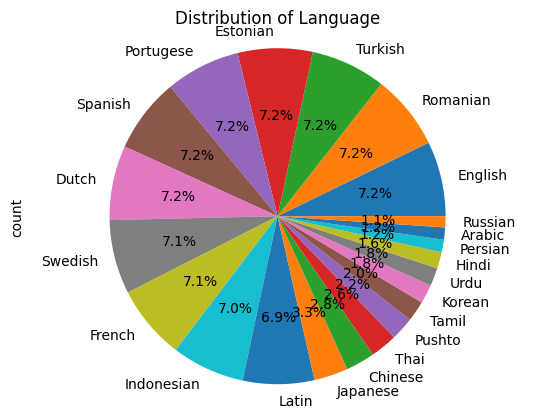

C:\Users\OLUWADAMMY\AppData\Local\Temp\ipykernel_26824\2689085613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="language", data=df, palette="tab10")


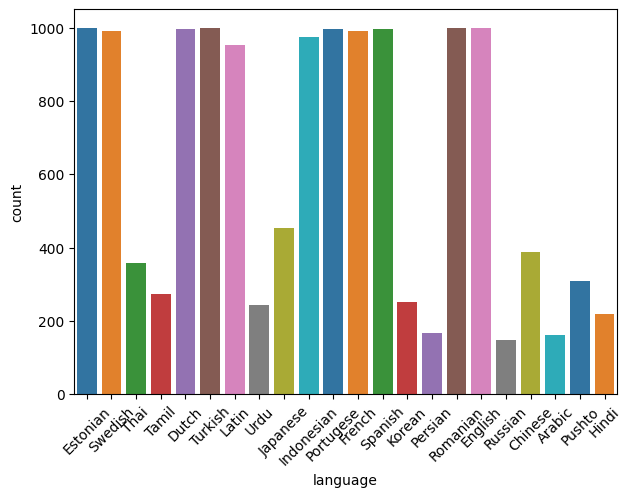

In [57]:


counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Language')
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(x="language", data=df, palette="tab10")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 90 degrees
plt.show()




In [58]:
def word_cloud(language, color):
    
    text_df = df[df['language'] == f'{language}']
    stopwords = set(STOPWORDS)
    text2 = "  ".join(review for review in text_df['Text'])  
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color=f"{color}", stopwords=stopwords).generate(text2)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

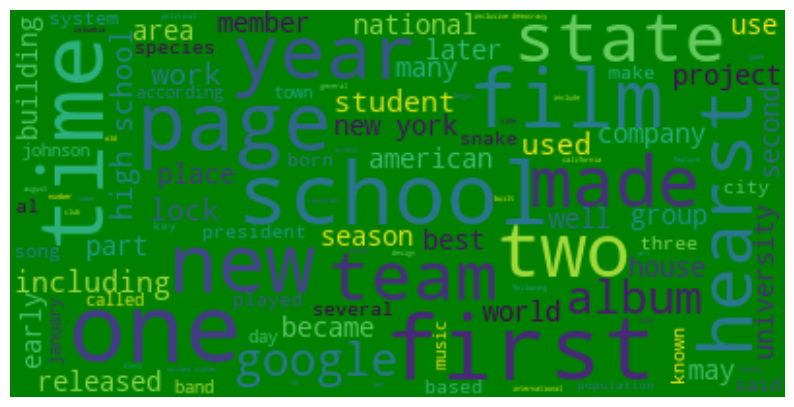

In [59]:

word_cloud(language="English", color="green")


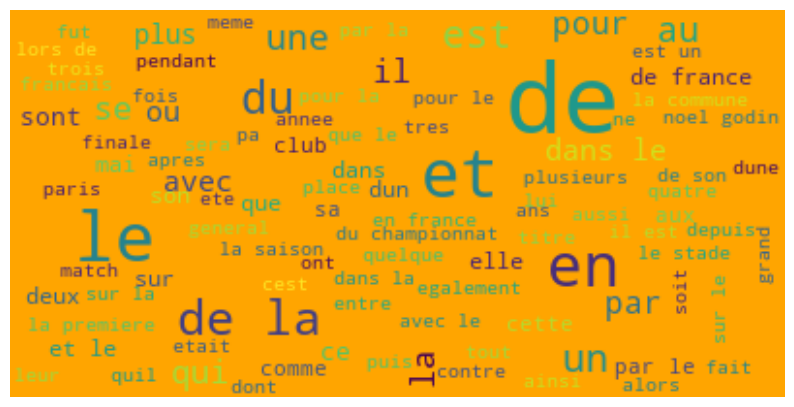

In [60]:

word_cloud(language="French", color="orange")



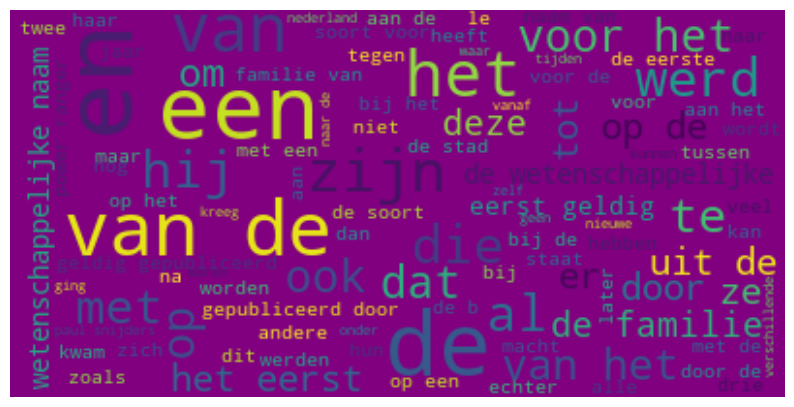

In [61]:

word_cloud(language="Dutch", color="purple")



In [62]:


# Label Encoding: Convert the "language" feature using label encoding. Assign unique integer labels to each language.
from sklearn.preprocessing import LabelEncoder
label_encoder  = LabelEncoder()
df["Encoded language"]=label_encoder.fit_transform(df["language"])
df

,Text,language,Encoded language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,4
1,sebes joseph pereira thomas pa eng jesuits sin...,Swedish,17
2,thanon charoen krung,Thai,19
3,,Tamil,18
4,de spons behoort tot het geslacht haliclona en...,Dutch,2
...,...,...,...
13865,lennuk oli eriti hea manooverdusvoimega korgus...,Estonian,4
13866,hors du terrain les annees et sont des annees ...,French,5
13867,con motivo de la celebracion del septuagesimoq...,Spanish,16
13868,mai kbaby like biprecord love day tomorrow,Chinese,1


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [64]:
tf= TfidfVectorizer()

X=df["Text"]
Y=df["language"]

train_data=tf.fit_transform(X)
print(train_data)

  (0, 43306)	0.15379186688326787
  (0, 121297)	0.15379186688326787
  (0, 75886)	0.1394773386624512
  (0, 45412)	0.15379186688326787
  (0, 112365)	0.1394773386624512
  (0, 43300)	0.15379186688326787
  (0, 74618)	0.2274431437002131
  (0, 164)	0.21321203324057536
  (0, 55029)	0.26844176660979735
  (0, 63283)	0.24261259830381746
  (0, 121296)	0.15379186688326787
  (0, 59180)	0.15379186688326787
  (0, 6236)	0.10907783250696229
  (0, 67319)	0.15379186688326787
  (0, 105440)	0.080359760121796
  (0, 116787)	0.13422088330489867
  (0, 147)	0.08265003710003961
  (0, 111466)	0.15379186688326787
  (0, 60633)	0.14745758723744043
  (0, 48973)	0.15379186688326787
  (0, 44905)	0.12231453643950406
  (0, 79965)	0.15379186688326787
  (0, 78860)	0.15379186688326787
  (0, 52850)	0.12298856760925163
  (0, 46676)	0.14745758723744043
  :	:
  (13869, 85764)	0.20707833503303022
  (13869, 101917)	0.1924978993339205
  (13869, 101107)	0.198549326904875
  (13869, 68984)	0.39709865380975
  (13869, 89689)	0.1878040474

In [65]:
from sklearn.model_selection import train_test_split

# Using 20% of my data for the test, and using 80% for training, https://youtu.be/NQifPki6tGE?si=6VVhTbTb5NErGevJ


X_train,X_test,Y_train,Y_test=train_test_split(train_data,Y,test_size=0.2,random_state=42)



In [1]:
type(Y_test)

NameError: name 'Y_test' is not defined

In [66]:
svm= SVC()  
svm.fit(X_train, Y_train)


SVC()

In [67]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.43%


![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

In [68]:
# Train the SVM model only if the trained model is not already saved
if not os.path.exists("svm_model.pkl"):
    joblib.dump(svm, "svm_model.pkl")
else:
    # Load the trained model from disk
    svm = joblib.load("svm_model.pkl")

# Confusion matrix

In [69]:
enccoded_languages = sorted(df["Encoded language"].unique()) 
unique_languages = sorted(df["language"].unique())
df

,Text,language,Encoded language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,4
1,sebes joseph pereira thomas pa eng jesuits sin...,Swedish,17
2,thanon charoen krung,Thai,19
3,,Tamil,18
4,de spons behoort tot het geslacht haliclona en...,Dutch,2
...,...,...,...
13865,lennuk oli eriti hea manooverdusvoimega korgus...,Estonian,4
13866,hors du terrain les annees et sont des annees ...,French,5
13867,con motivo de la celebracion del septuagesimoq...,Spanish,16
13868,mai kbaby like biprecord love day tomorrow,Chinese,1


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French', 'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian', 'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu']


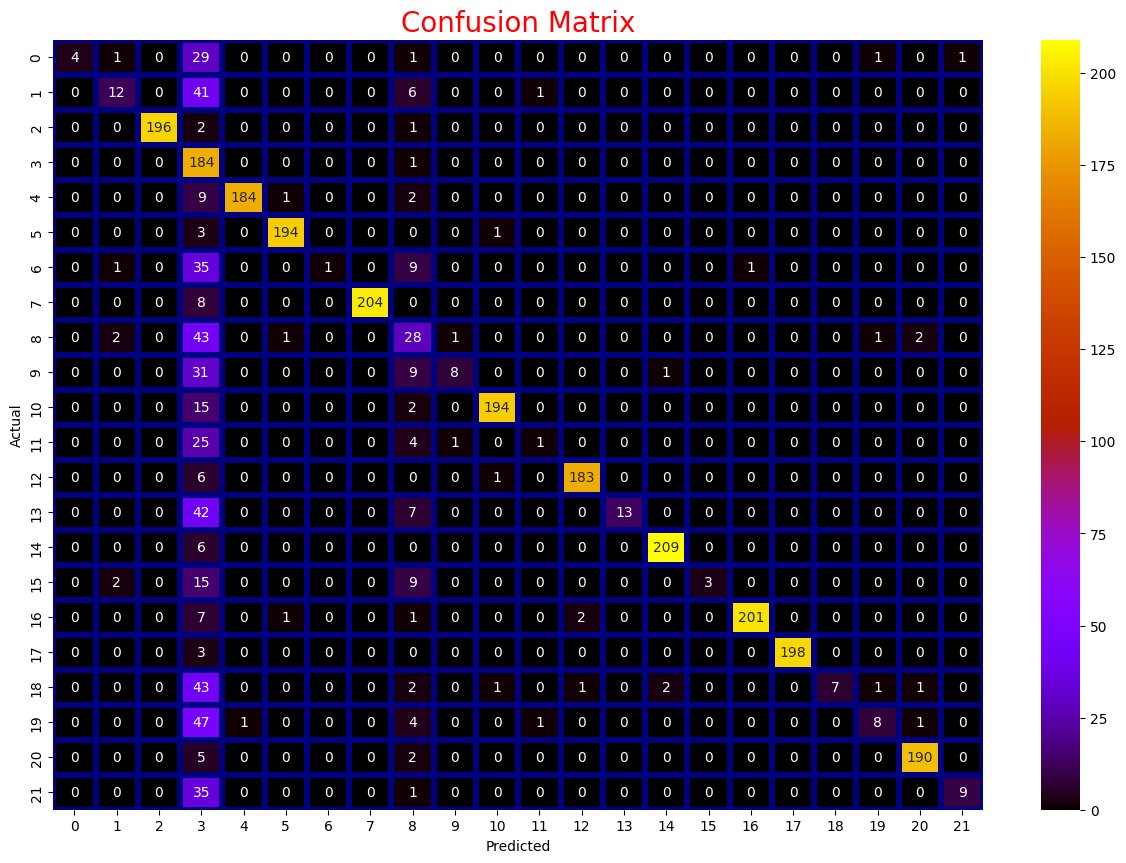

In [70]:
print(enccoded_languages)
print(unique_languages)
cf=confusion_matrix(Y_test,y_pred)
label_name=enccoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="gnuplot",
           linewidths=3, linecolor='navy')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report

In [71]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      0.11      0.20        37
     Chinese       0.67      0.20      0.31        60
       Dutch       1.00      0.98      0.99       199
     English       0.29      0.99      0.45       185
    Estonian       0.99      0.94      0.97       196
      French       0.98      0.98      0.98       198
       Hindi       1.00      0.02      0.04        47
  Indonesian       1.00      0.96      0.98       212
    Japanese       0.31      0.36      0.34        78
      Korean       0.80      0.16      0.27        49
       Latin       0.98      0.92      0.95       211
     Persian       0.33      0.03      0.06        31
   Portugese       0.98      0.96      0.97       190
      Pushto       1.00      0.21      0.35        62
    Romanian       0.99      0.97      0.98       215
     Russian       1.00      0.10      0.19        29
     Spanish       1.00      0.95      0.97       212
     Swedish       1.00    

# Roc Auc

In [72]:
# from yellowbrick.classifier import ROCAUC

# model = SVC()
# visualizer = ROCAUC(model, classes=label_name)

# visualizer.fit(X_train, Y_train)
# visualizer.score(X_test, Y_test)
# plt.figure(figsize=(20, 15))

# visualizer.show()


# Naive Bayes

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
nb= MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [75]:
pred1=nb.predict(X_test)
accuracy1 = accuracy_score(Y_test,pred1)
print(f"Accuracy: {accuracy1 * 100:.2f}%")

Accuracy: 79.13%


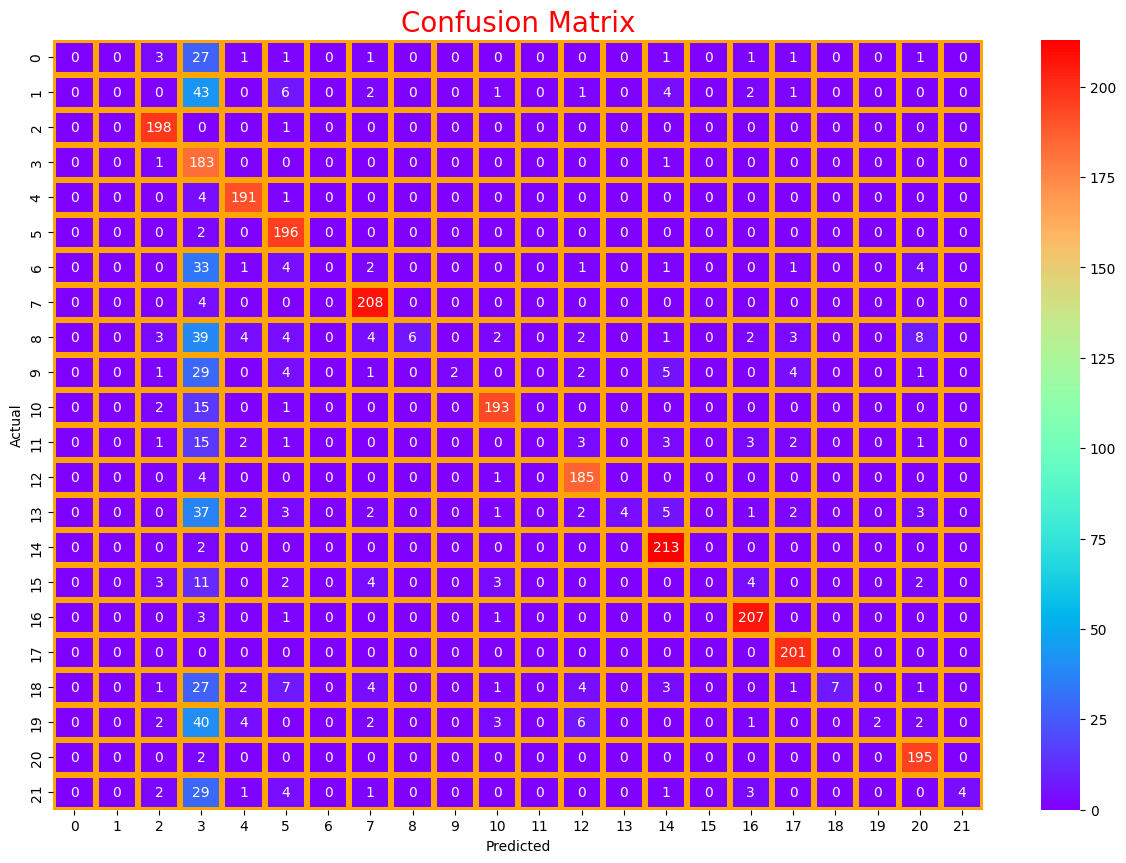

In [76]:
cf0=confusion_matrix(Y_test,pred1)
label_name=enccoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf0,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="rainbow",
           linewidths=3, linecolor='orange')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [77]:
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

      Arabic       0.00      0.00      0.00        37
     Chinese       0.00      0.00      0.00        60
       Dutch       0.91      0.99      0.95       199
     English       0.33      0.99      0.50       185
    Estonian       0.92      0.97      0.95       196
      French       0.83      0.99      0.90       198
       Hindi       0.00      0.00      0.00        47
  Indonesian       0.90      0.98      0.94       212
    Japanese       1.00      0.08      0.14        78
      Korean       1.00      0.04      0.08        49
       Latin       0.94      0.91      0.93       211
     Persian       0.00      0.00      0.00        31
   Portugese       0.90      0.97      0.93       190
      Pushto       1.00      0.06      0.12        62
    Romanian       0.89      0.99      0.94       215
     Russian       0.00      0.00      0.00        29
     Spanish       0.92      0.98      0.95       212
     Swedish       0.93    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# model = MultinomialNB()
# visualizer = ROCAUC(model, classes=label_name)

# visualizer.fit(X_train, Y_train)
# visualizer.score(X_test, Y_test)
# plt.figure(figsize=(20, 15))

# visualizer.show()

# CountVectorizer

In [79]:
import numpy as np
X_data=df["Text"]
Y_data=df["language"]

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
new_data=vectorizer.fit_transform(X_data)

In [81]:
x_train,x_test,y_train,y_test=train_test_split(new_data,Y_data,test_size=0.3,random_state=42)

In [82]:
new_svm = SVC()  
new_svm.fit(x_train, y_train)

SVC()

In [83]:
new_pred= new_svm.predict(x_test)
new_accuracy = accuracy_score(y_test,new_pred)
print(f"Accuracy: {new_accuracy * 100:.2f}%")

Accuracy: 77.82%


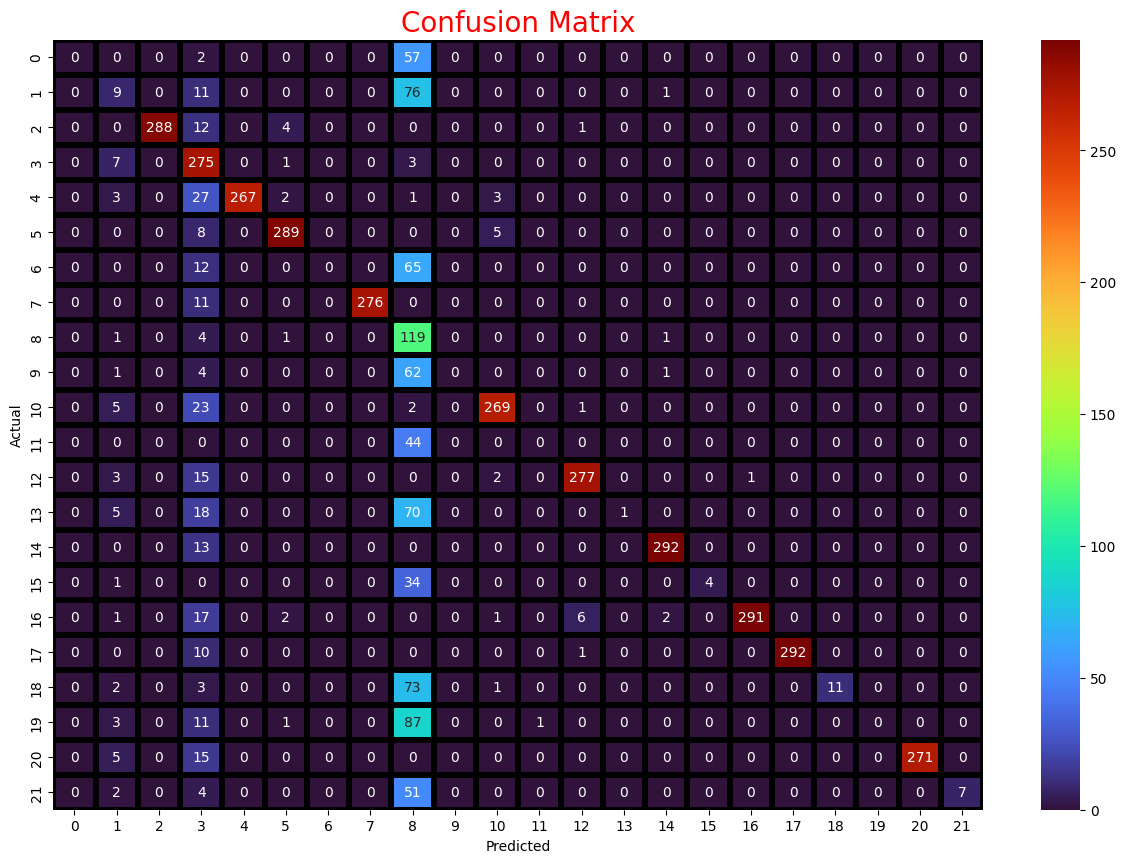

In [84]:
cf2=confusion_matrix(y_test,new_pred)
label_name=enccoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf2,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="turbo",
           linewidths=3, linecolor='black')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [85]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

      Arabic       0.00      0.00      0.00        59
     Chinese       0.19      0.09      0.12        97
       Dutch       1.00      0.94      0.97       305
     English       0.56      0.96      0.70       286
    Estonian       1.00      0.88      0.94       303
      French       0.96      0.96      0.96       302
       Hindi       0.00      0.00      0.00        77
  Indonesian       1.00      0.96      0.98       287
    Japanese       0.16      0.94      0.27       126
      Korean       0.00      0.00      0.00        68
       Latin       0.96      0.90      0.93       300
     Persian       0.00      0.00      0.00        44
   Portugese       0.97      0.93      0.95       298
      Pushto       1.00      0.01      0.02        94
    Romanian       0.98      0.96      0.97       305
     Russian       1.00      0.10      0.19        39
     Spanish       1.00      0.91      0.95       320
     Swedish       1.00    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
# new_model = SVC()
# visualizer = ROCAUC(new_model, classes=label_name)

# visualizer.fit(x_train, y_train)
# visualizer.score(x_test, y_test)
# plt.figure(figsize=(20, 15))

# visualizer.show()

# naive Bayes+Countvectorizer

In [87]:
new_nb= MultinomialNB()
new_nb.fit(x_train,y_train)

MultinomialNB()

In [88]:
pred3=nb.predict(x_test)
accuracy1 = accuracy_score(y_test,pred3)
print(f"Accuracy: {accuracy1 * 100:.2f}%")

Accuracy: 81.59%


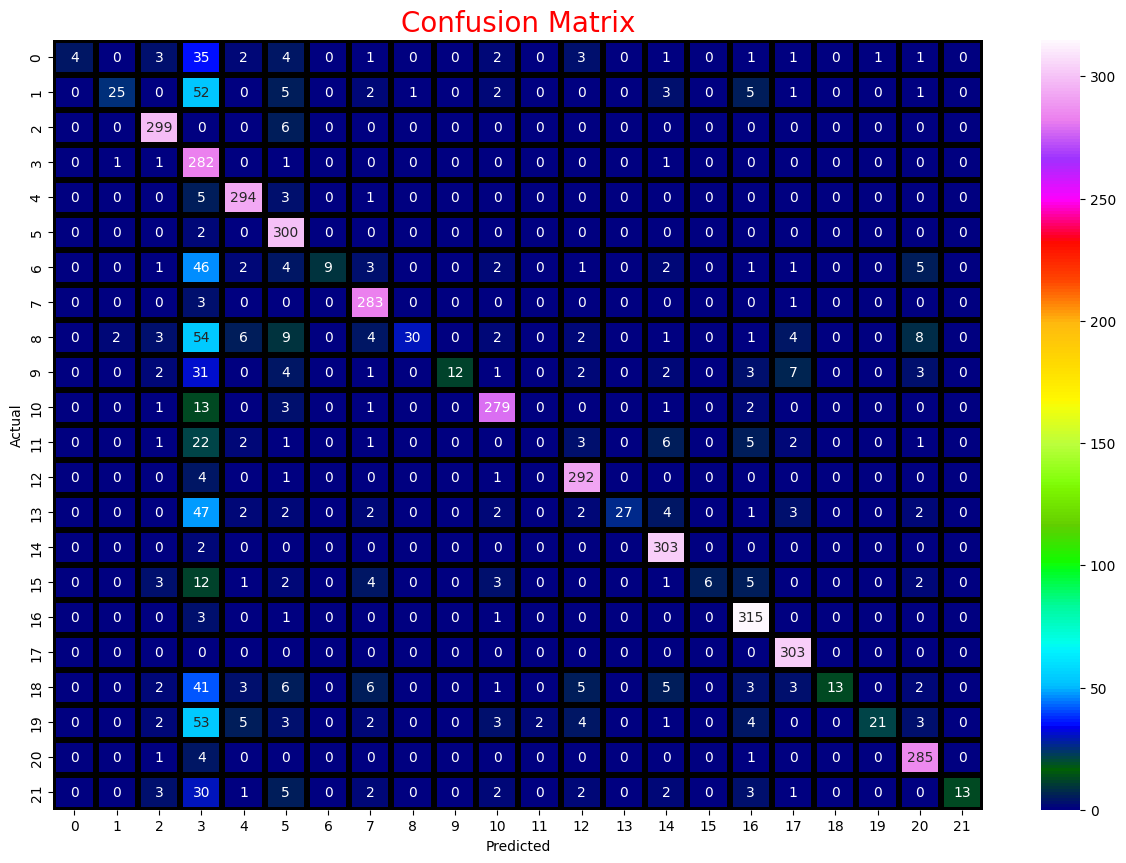

In [89]:
cf4=confusion_matrix(y_test,pred3)
label_name= enccoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf4,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="gist_ncar",
           linewidths=3, linecolor='black')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [90]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

      Arabic       1.00      0.07      0.13        59
     Chinese       0.89      0.26      0.40        97
       Dutch       0.93      0.98      0.95       305
     English       0.38      0.99      0.55       286
    Estonian       0.92      0.97      0.95       303
      French       0.83      0.99      0.91       302
       Hindi       1.00      0.12      0.21        77
  Indonesian       0.90      0.99      0.94       287
    Japanese       0.97      0.24      0.38       126
      Korean       1.00      0.18      0.30        68
       Latin       0.93      0.93      0.93       300
     Persian       0.00      0.00      0.00        44
   Portugese       0.92      0.98      0.95       298
      Pushto       1.00      0.29      0.45        94
    Romanian       0.91      0.99      0.95       305
     Russian       1.00      0.15      0.27        39
     Spanish       0.90      0.98      0.94       320
     Swedish       0.93    

In [91]:
# new_mo = MultinomialNB()
# visualizer = ROCAUC(new_mo, classes=label_name)

# visualizer.fit(x_train, y_train)
# visualizer.score(x_test, y_test)
# plt.figure(figsize=(20, 15))

# visualizer.show()